### Regresja liniowa – ogólna idea

#### Zadaniem regresji liniowej jest po prostu dopasowanie prostej linii do danych. Warto podkreślić, że regresja liniowa przyjmuje założenie, że związek między cechami a zmienną objaśnianą jest mniej więcej liniowy.

## Regresja liniowa

**1. Cel**: Regresja liniowa ma na celu znalezienie liniowej **zależności między zmienną zależną (objaśnianą) a jedną lub więcej zmiennymi niezależnymi (objaśniającymi)**.

**2. Model**: W najprostszym przypadku, model regresji liniowej można zapisać jako równanie:

   $$y = ax + b + ε$$

   gdzie `y` to zmienna zależna, `x` to zmienna niezależna, `a` to współczynnik kierunkowy (nachylenie prostej), `b` to wyraz wolny (punkt przecięcia z osią Y), a `ε` to składnik losowy (błąd).

**3. Estymacja parametrów**: Najczęściej używaną metodą do oszacowania parametrów a i b jest metoda najmniejszych kwadratów. Metoda ta minimalizuje sumę kwadratów odległości między punktami danych a linią regresji.

**4. Interpretacja**:
   - Współczynnik kierunkowy (a) pokazuje, o ile zmieni się y, gdy x wzrośnie o jednostkę.
   - Wyraz wolny (b) to wartość y, gdy x wynosi zero.

**5. Założenia**: Aby regresja liniowa była poprawna, muszą być spełnione pewne założenia, takie jak liniowość relacji między zmiennymi, normalność rozkładu reszt, homoskedastyczność (stała wariancja reszt).

**6. Zastosowania**: Regresja liniowa jest szeroko stosowana w różnych dziedzinach, od ekonomii po nauki przyrodnicze, do przewidywania wartości zmiennej zależnej na podstawie zmiennych niezależnych.

**7. Zalety**: Prostota, interpretowalność i szybkość obliczeń to główne zalety regresji liniowej.

## Założenia

### 1. Liniowość relacji między zmiennymi

Założenie to oznacza, że istnieje liniowa zależność między zmienną zależną (y) a zmiennymi niezależnymi (x). W praktyce oznacza to, że zmiana wartości zmiennej niezależnej powoduje proporcjonalną zmianę wartości zmiennej zależnej.

**Jak sprawdzić?**
- **Wykresy rozrzutu (scatter plots)** między zmiennymi niezależnymi a zależną mogą pomóc wizualnie ocenić liniowość.
- Wykresy reszt (residual plots) powinny pokazywać losowy rozkład reszt wokół osi poziomej.

In [1]:
import numpy as np

In [2]:
np.random.rand(100)

array([0.59297469, 0.94167722, 0.11451185, 0.80458872, 0.25605445,
       0.76742896, 0.32605601, 0.45703852, 0.64683832, 0.06906646,
       0.18266598, 0.51656098, 0.430689  , 0.32107236, 0.60730341,
       0.75131139, 0.39910979, 0.69567311, 0.00441093, 0.09868349,
       0.25021178, 0.62457111, 0.53257847, 0.33246324, 0.93615068,
       0.2968599 , 0.6724517 , 0.12176169, 0.46884286, 0.09697595,
       0.37415552, 0.60745061, 0.19247325, 0.57204473, 0.49919926,
       0.42967436, 0.08190352, 0.61464884, 0.71098593, 0.70242044,
       0.11634503, 0.27551663, 0.10074989, 0.16140958, 0.99580935,
       0.98702703, 0.4129863 , 0.25789982, 0.07229501, 0.71488443,
       0.55805767, 0.83118475, 0.79511578, 0.79947271, 0.02135853,
       0.74488463, 0.80317607, 0.00153435, 0.02238884, 0.32843053,
       0.65794565, 0.74852276, 0.0845915 , 0.51870688, 0.454307  ,
       0.03340875, 0.71383018, 0.71300287, 0.62044146, 0.04317941,
       0.1149075 , 0.5400041 , 0.70735485, 0.32658363, 0.89059

Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 3 ("axes.prop_cycle: cycler('color', ['#123D98', '#C21E3C', '#E2A713', '#00AEEF', '#7F3F98'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
Bad value in file PosixPath('/Users/tomasz/.matplotlib/stylelib/company.mplstyle'), line 6 ('grid.color: #e0e0e0'): Key grid.color: '' does not look like a color arg


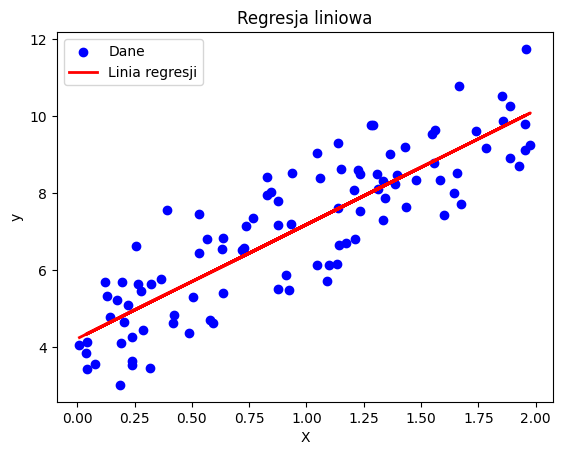

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generowanie przykładowych danych
np.random.seed(0)
X = 2 * np.random.rand(100, 1) #losowanie z jednolitego rozkładu ciągłego (uniform distribution) na przedziale [0,1)

y = 4 + 3 * X + np.random.randn(100, 1)

# Dopasowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Tworzenie wykresu
plt.scatter(X, y, color='blue', label='Dane')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linia regresji')
plt.title('Regresja liniowa')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Mamy już nasze równanie i wartości rzeczywiste. Możemy teraz wyliczyć, jaka jest różnica między tymi wartościami. Nazywamy ją resztą (ang. residual). Tak naprawdę w metodzie najmniejszych kwadratów właśnie te różnice były minimalizowane podczas liczenia parametru a oraz b.

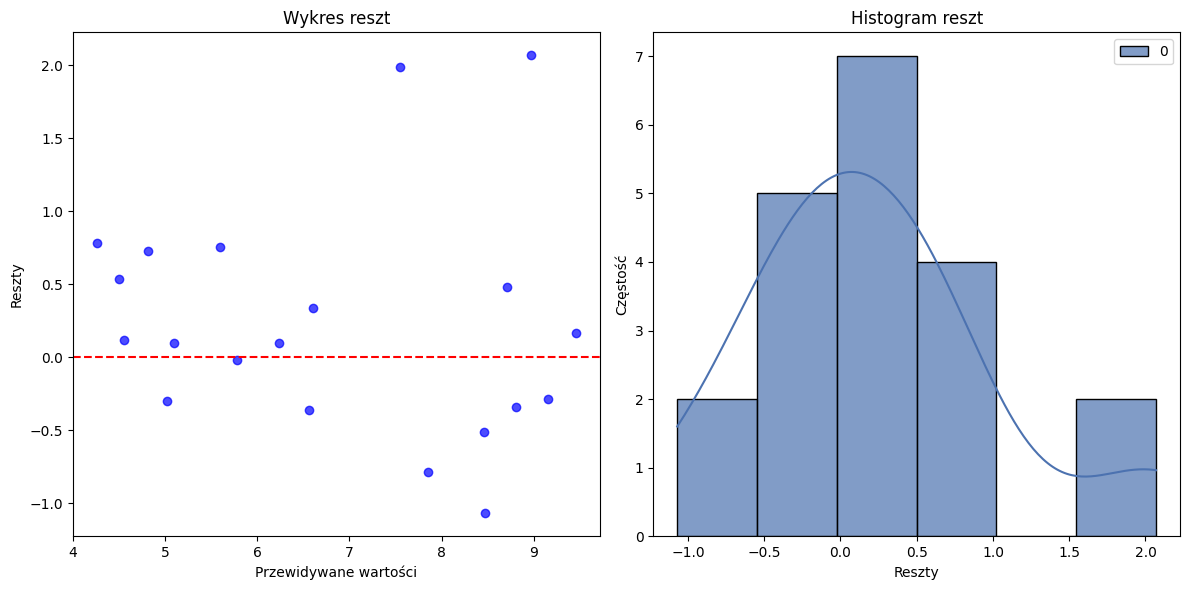

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Ustawienie stylu dla wykresów
# plt.style.use('seaborn')
sns.set_palette("deep")

# Generowanie danych
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dopasowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie wartości
y_pred = model.predict(X_test)

# Obliczanie reszt
residuals = y_test - y_pred

# Tworzenie wykresu reszt
plt.figure(figsize=(12, 6))

# Wykres rozrzutu reszt
plt.subplot(121)
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Wykres reszt')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')

# Histogram reszt
plt.subplot(122)
sns.histplot(residuals, kde=True, color='blue', alpha=0.7)
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Częstość')

plt.tight_layout()
plt.show()

### Wykres rozrzutu reszt

Ten wykres pokazuje reszty (różnice między rzeczywistymi a przewidywanymi wartościami) w funkcji przewidywanych wartości.

**Interpretacja:**
- Punkty powinny być losowo rozrzucone wokół linii y=0 (czerwona przerywana linia).
- Nie powinno być widocznych wzorców ani trendów.
- Rozrzut punktów powinien być mniej więcej stały dla wszystkich przewidywanych wartości.

**Co szukać:**
- Jeśli punkty tworzą wzór (np. kształt U lub odwrócone U), może to wskazywać na nieliniowość w danych.
- Jeśli punkty grupują się w określonych obszarach, może to sugerować obecność podgrup w danych.

### Histogram reszt

Ten wykres pokazuje rozkład reszt.

**Interpretacja:**
- Histogram powinien być w przybliżeniu symetryczny i dzwonowaty (normalny).
- Większość reszt powinna skupiać się wokół zera.

**Co szukać:**
- Jeśli histogram jest wyraźnie asymetryczny lub ma wiele szczytów, może to wskazywać na naruszenie założenia o normalności reszt.
- Jeśli histogram jest przesunięty w lewo lub prawo od zera, może to sugerować systematyczne przeszacowanie lub niedoszacowanie modelu.

### Ogólne wnioski

- Jeśli oba wykresy wyglądają "dobrze" (losowy rozrzut na wykresie reszt i w przybliżeniu normalny rozkład na histogramie), sugeruje to, że **założenia regresji liniowej są spełnione**.
- Jeśli zauważysz jakiekolwiek wzorce lub odstępstwa od oczekiwań, może to wskazywać na problemy z modelem, takie jak nieliniowość, heteroskedastyczność lub brak normalności reszt.

Pamiętaj, że te wykresy są narzędziami diagnostycznymi i powinny być interpretowane w kontekście konkretnego problemu i dziedziny zastosowania.

### 2. Normalność rozkładu reszt

Założenie to oznacza, że reszty (różnice między wartościami obserwowanymi a przewidywanymi) są rozkładane normalnie. Normalność reszt jest ważna dla testów statystycznych i wnioskowania.

**Jak sprawdzić?**
- Wykresy Q-Q (quantile-quantile plots) mogą być używane do oceny, czy reszty są normalnie rozkładane.
- Testy statystyczne, takie jak test Shapiro-Wilka, mogą być używane do formalnej oceny normalności.

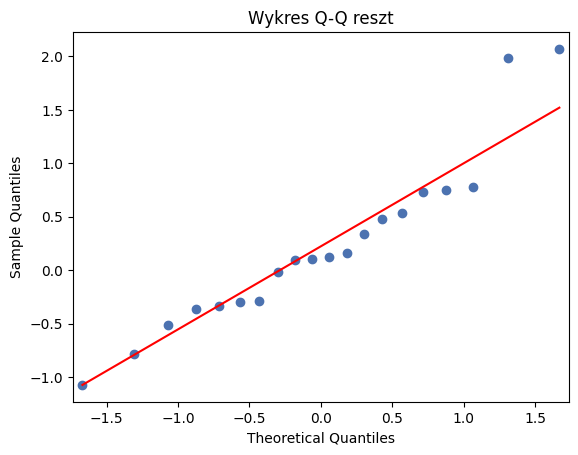

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generowanie danych
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dopasowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

# Przewidywanie wartości
y_pred = model.predict(X_test)

# Obliczanie reszt
residuals = y_test - y_pred

# Tworzenie wykresu Q-Q
sm.qqplot(residuals.flatten(), line='s')
plt.title('Wykres Q-Q reszt')
plt.show()

### Interpretacja wykresu Q-Q

Wykres Q-Q (quantile-quantile plot) porównuje kwantyle rozkładu reszt z kwantylami teoretycznego rozkładu normalnego.

**Interpretacja:**
- Punkty na wykresie Q-Q powinny układać się wzdłuż linii prostej, jeśli reszty są normalnie rozkładane.
- Odchylenia od linii prostej mogą wskazywać na nienormalność rozkładu reszt.

**Co szukać:**
- Jeśli punkty układają się wzdłuż linii prostej, założenie o normalności reszt jest spełnione.
- Jeśli punkty odchylają się od linii prostej, może to wskazywać na naruszenie założenia o normalności reszt.

Statystyka testowa Shapiro-Wilka: 0.9846272468566895
p-wartość: 0.2984403073787689
Nie ma wystarczających dowodów, aby odrzucić hipotezę o normalności rozkładu reszt.


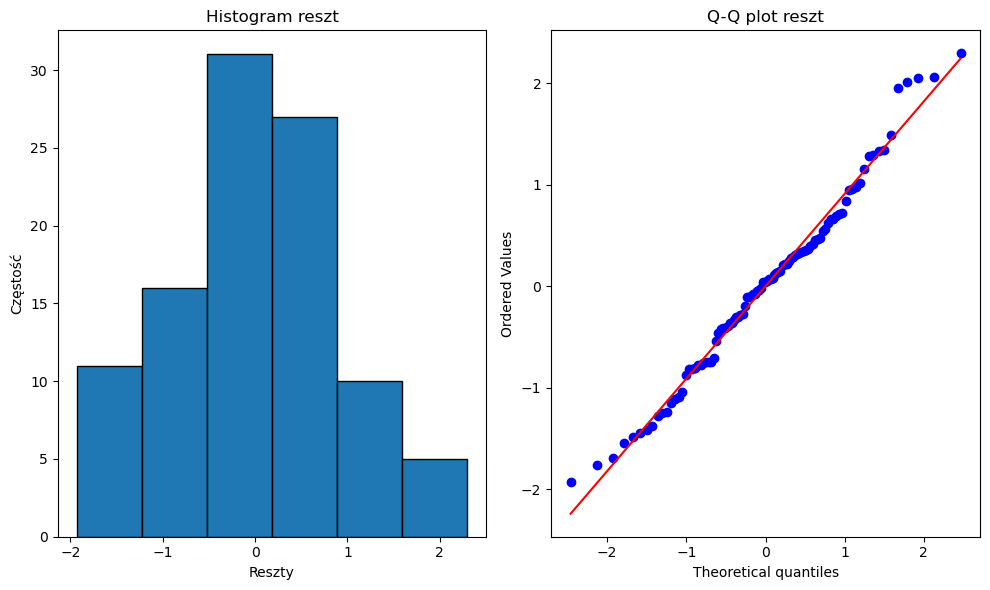

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Generowanie danych
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Dopasowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Obliczanie reszt
y_pred = model.predict(X)
residuals = y - y_pred

# Przeprowadzenie testu Shapiro-Wilka
statistic, p_value = stats.shapiro(residuals)

print(f"Statystyka testowa Shapiro-Wilka: {statistic}")
print(f"p-wartość: {p_value}")

# Interpretacja wyników
alpha = 0.05
if p_value > alpha:
    print("Nie ma wystarczających dowodów, aby odrzucić hipotezę o normalności rozkładu reszt.")
else:
    print("Istnieją statystycznie istotne dowody, że reszty nie mają rozkładu normalnego.")

# Wizualizacja rozkładu reszt
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.hist(residuals, bins=6, edgecolor='black')
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Częstość')

plt.subplot(122)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q plot reszt')

plt.tight_layout()
plt.show()

### Test Shapiro-Wilka (opcjonalnie)

Test Shapiro-Wilka jest testem statystycznym, który sprawdza hipotezę zerową, że próbka pochodzi z populacji o rozkładzie normalnym. Jest szczególnie skuteczny dla małych próbek (n < 50), ale może być stosowany również dla większych zbiorów danych.

**Hipotezy:**
- H0 (hipoteza zerowa): Próbka pochodzi z populacji o rozkładzie normalnym.
- H1 (hipoteza alternatywna): Próbka nie pochodzi z populacji o rozkładzie normalnym.

**Interpretacja wyników:**
- Jeśli p-wartość > α (zazwyczaj 0.05), nie odrzucamy hipotezy zerowej. Oznacza to, że nie ma wystarczających dowodów, aby stwierdzić, że dane nie pochodzą z rozkładu normalnego.
- Jeśli p-wartość ≤ α, odrzucamy hipotezę zerową na rzecz hipotezy alternatywnej. Oznacza to, że mamy statystycznie istotne dowody, że dane nie pochodzą z rozkładu normalnego.


### Wyjaśnienie kodu:

1. Generujemy przykładowe dane i dopasowujemy model regresji liniowej.
2. Obliczamy reszty (różnice między rzeczywistymi a przewidywanymi wartościami).
3. Przeprowadzamy test Shapiro-Wilka używając funkcji `stats.shapiro()` z biblioteki SciPy.
4. Wyświetlamy statystykę testową i p-wartość.
5. Interpretujemy wyniki na podstawie p-wartości.
6. Wizualizujemy rozkład reszt za pomocą histogramu i wykresu Q-Q.

### Interpretacja wyników:

- Jeśli p-wartość jest większa niż przyjęty poziom istotności (zazwyczaj 0.05), nie mamy podstaw do odrzucenia hipotezy o normalności rozkładu reszt.
- Jeśli p-wartość jest mniejsza lub równa poziomowi istotności, mamy statystycznie istotne dowody, że reszty nie mają rozkładu normalnego.

### Dodatkowe uwagi:

1. Test Shapiro-Wilka jest tylko jednym z wielu testów normalności. Inne popularne testy to test Kolmogorova-Smirnova czy test Andersona-Darlinga.
2. Warto pamiętać, że testy statystyczne mogą być zbyt "czułe" dla dużych zbiorów danych, odrzucając hipotezę o normalności nawet przy niewielkich odchyleniach.
3. Zawsze warto uzupełnić testy statystyczne o wizualną inspekcję danych (np. histogram, wykres Q-Q).
4. W praktyce, małe odchylenia od normalności często nie mają dużego wpływu na wyniki regresji liniowej, szczególnie dla dużych próbek.

### 3. Homoskedastyczność (stała wariancja reszt)

Homoskedastyczność oznacza, że wariancja reszt jest stała dla wszystkich wartości zmiennych niezależnych. Innymi słowy, rozproszenie reszt powinno być takie samo niezależnie od wartości zmiennych niezależnych.

**Jak sprawdzić?**
- Wykresy reszt (residual plots) mogą być używane do oceny homoskedastyczności. Jeśli reszty są losowo rozproszone wokół osi poziomej, założenie jest spełnione.
- Testy statystyczne, takie jak test Breuscha-Pagana, mogą być używane do formalnej oceny homoskedastyczności.

### 4. Brak współliniowości między zmiennymi niezależnymi

Założenie to oznacza, że zmienne niezależne nie są silnie skorelowane ze sobą. Wysoka współliniowość może prowadzić do niestabilnych estymacji współczynników regresji.

**Jak sprawdzić?**
- Macierz korelacji może być używana do oceny współliniowości między zmiennymi niezależnymi.

### 5. Istotność zmiennych

Założenie to oznacza, że wszystkie istotne zmienne zostały uwzględnione w modelu. Pominięcie istotnych zmiennych może prowadzić do błędnych wniosków.

### 2 metody estymacji parametrów w regresji liniowej

- Za pomocą "jawnego" wzoru bezpośrednio wyliczającego parametry (np. parametry minimalizujące **funkcję kosztu** (metoda najmnijeszych kwadratów) - **Równanie normalne**

- Za pomocą iteracyjnej metody optymalizacyjnej zwanej metodą gradientu prostego, dzięki której parametry modelu są stopniowo poprawiane w celu zminimalizowania funkcji kosztu, co pozwala ostatecznie uzystać te same (lub bardzo zbliżone) wartości parametrów, co w przypadku pierwszej metody - **Metoda gradientu prostego**

### Metoda najmniejszych kwadratów:

Celem metody najmniejszych kwadratów jest znalezienie takich parametrów modelu (współczynnika kierunkowego i wyrazu wolnego), które minimalizują funkcję kosztu. Ta funkcja kosztu jest sumą kwadratów błędów między wartościami obserwowanymi a przewidywanymi.

### Regresja liniowa – wady i zalety

#### Zalety:
- Prostota – dzięki swojej prostocie wykorzystywana jest w wielu dziedzinach: od matematyki, poprzez ekonomię, aż po geodezję,
- interpretowalność – dzięki prostym wzorom bardzo łatwo wyjaśnić biznesowi lub innym osobom, jak dana cecha wpływa na wynik modelu,
- szybkość – nawet przy dużej liczbie danych dla tych prostych algorytmów wyniki dostajemy prawie od razu.

#### Wady:
Prostota – świat nie składa się z prostych liniowych zależności. Gdyby tak było, to pewnie nie byłoby takiego rozwoju uczenia maszynowego.

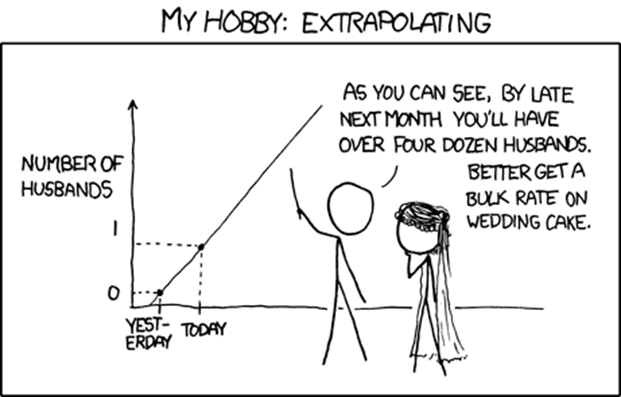

#### Inny nieoczywisty przypadek wady interpolacji liniowej/wykładniczej

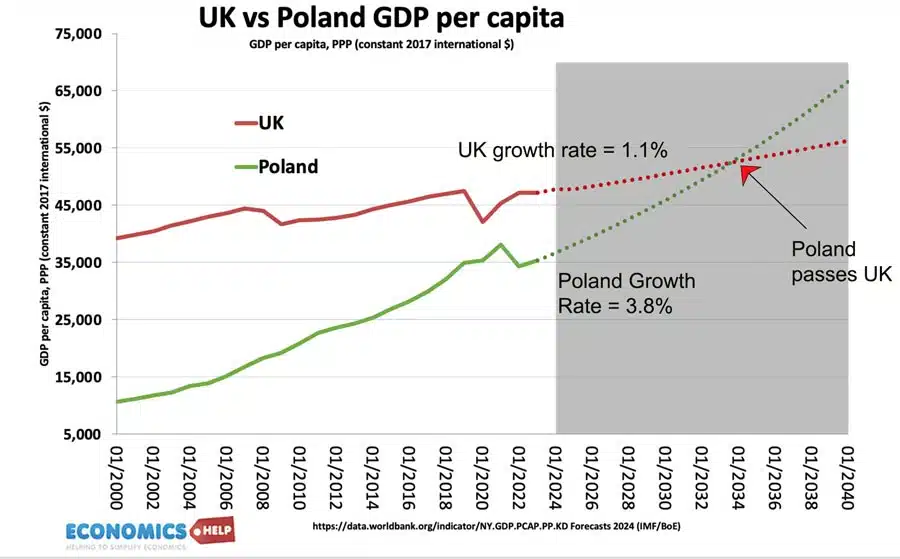

###### https://www.youtube.com/watch?v=sjusqc20oTo